# TP4 - Le déclenchement de la Commune de Paris vu par les journaux belges

# Interrogation de Wikidata à l'aide de requêtes SPARQL
Qui furent les communards?

## Imports

In [1]:
from datetime import datetime as dt
from SPARQLWrapper import SPARQLWrapper, JSON

## Obtenir la liste des communards
Nous observons que pour certains, un identifiant est affiché au lieu du nom. Cela peut arriver s'il n'y a pas de label en anglais, comme par exemple pour Pelagia Dąbrowska née Zgliczyńska, Q110918322

In [3]:
# Retrieve results from SPARQL
endpoint = "https://query.wikidata.org/bigdata/namespace/wdq/sparql"
sparql = SPARQLWrapper(endpoint)

# P31 = instance of 
# Q5 = human
# P106 = Opccupation
# Q1780490 = communard
statement = """
SELECT DISTINCT ?person ?personLabel  WHERE {
    ?person wdt:P106 wd:Q1780490 .
    SERVICE wikibase:label { bd:serviceParam wikibase:language "en" . }
}
ORDER BY ?personLabel
"""

sparql.setQuery(statement)
sparql.setReturnFormat(JSON)
results = sparql.query().convert()

rows = results['results']['bindings']
print(f"\n{len(rows)} communards trouvés dans Wikidata\n")
print(rows[:2])


295 Nombre de communards trouvés dans Wikidata

[{'person': {'type': 'uri', 'value': 'http://www.wikidata.org/entity/Q110918322'}, 'personLabel': {'type': 'literal', 'value': 'Q110918322'}}, {'person': {'type': 'uri', 'value': 'http://www.wikidata.org/entity/Q115179017'}, 'personLabel': {'type': 'literal', 'value': 'Q115179017'}}]


In [6]:
max_results = 50

filtered_rows = [row for row in rows ]
print(f"Displaying the first {max_results}:\n")
for row in filtered_rows[:max_results]:
      print(f"{row['personLabel']['value']} ")

Displaying the first 50:

Q110918322 
Q115179017 
Q115257367 
Q115257377 
Achille Ballière 
Adolf Rozwadowski 
Adolphe Assi 
Adolphe Clémence 
Adrien Lejeune 
Adèle Esquiros 
Adélaïde Valentin 
Aglaé Jarry 
Aimée Delvainquier 
Albert Regnard 
Albert Theisz 
Alexandre Girault 
Alexis Louis Trinquet 
Alfred-Édouard Billioray 
Alice Bontemps 
Aline Jacquier 
Alix Payen 
Alphonse Humbert 
Alphonse Nicolas Lonclas 
Amilcare Cipriani 
Aminthe Dupont 
Amélie Payen 
André Bastelica 
André Gill 
André Slomszynski 
Angelina Courcelles 
Angelina Sabatier 
Anna Henryka Pustowojtowna 
Anna Joubert 
Anna Maillet 
Anne-Marie Ménand 
Antoine Demay 
Antoinette Legai 
Antonin Desfarges 
Aristide Claris 
Armand Antoine Jules Arnaud 
Armand Félix Marie Jobbé-Duval 
Arthur 
Arthur Arnould 
Arthur Ranc 
Auguste Adolphe Okolowicz 
Auguste Durassier 
Auguste Serraillier 
Auguste Sicard 
Auguste Viard 
Auguste-Jean-Marie Vermorel 


# Préparation du corpus

## Corpus général
Nous stockons le contenu de toutes les pages sélectionnées dans le fichier TP4.txt

In [7]:
# Lister les fichiers extraits de CAMille
data_path = '../data'
txt_path = '../data/TP4data'
txts = [f for f in os.listdir(txt_path) if os.path.isfile(os.path.join(txt_path, f)) ]
len(txts)

292

In [8]:
# Stocker le contenu de ces fichiers dans une liste
content_list = []
for txt in txts:
    with open(os.path.join(txt_path, txt), 'r', encoding='utf-8') as f:
        content_list.append(f.read())

In [9]:
# Compter le nombre d'éléments (=fichiers) dans la liste
len(content_list)

292

In [10]:
# Ecrire tout le contenu dans un fichier temporaire
temp_path = '../data/tmp'
if not os.path.exists(temp_path):
    os.mkdir(temp_path)
with open(os.path.join(temp_path, f'TP4.txt'), 'w', encoding='utf-8') as f:
    f.write(' '.join(content_list))

## L'Indépendance Belge
Nous stockons les pages extraites du journal "L'Indépendance Belge" dans un fichier TP4_1_Indep.txt

In [24]:
# Lister les fichiers extraits de CAMille
data_path = '../data'
txt_1_path = '../data/TP4_1_Indep'
txts_1 = [f for f in os.listdir(txt_1_path) if os.path.isfile(os.path.join(txt_1_path, f)) ]
len(txts_1)

98

In [25]:
# Stocker le contenu de ces fichiers dans une liste
content_list = []
for txt in txts_1:
    with open(os.path.join(txt_1_path, txt), 'r', encoding='utf-8') as f:
        content_list.append(f.read())

In [26]:
# Ecrire tout le contenu dans un fichier temporaire
temp_path = '../data/tmp'
if not os.path.exists(temp_path):
    os.mkdir(temp_path)
with open(os.path.join(temp_path, f'TP4_1_Indep.txt'), 'w', encoding='utf-8') as f:
    f.write(' '.join(content_list))

## Le Journal de Bruxelles
Nous stockons les pages extraites du "Journal de Bruxelles" dans un fichier TP4_2_Brux.txt

In [27]:
# Lister les fichiers extraits de CAMille
data_path = '../data'
txt_2_path = '../data/TP4_2_Brux'
txts_2 = [f for f in os.listdir(txt_2_path) if os.path.isfile(os.path.join(txt_2_path, f)) ]
len(txts_2)

83

In [29]:
# Stocker le contenu de ces fichiers dans une liste
content_list = []
for txt in txts_2:
    with open(os.path.join(txt_2_path, txt), 'r', encoding='utf-8') as f:
        content_list.append(f.read())

In [30]:
# Ecrire tout le contenu dans un fichier temporaire
temp_path = '../data/tmp'
if not os.path.exists(temp_path):
    os.mkdir(temp_path)
with open(os.path.join(temp_path, f'TP4_2_Brux.txt'), 'w', encoding='utf-8') as f:
    f.write(' '.join(content_list))

## Le Journal de Charleroi
Nous stockons les pages extraites du "Journal de Charleroi" dans un fichier TP4_3_Charl.txt

In [31]:
# Lister les fichiers extraits de CAMille
data_path = '../data'
txt_3_path = '../data/TP4_3_Charl'
txts_3 = [f for f in os.listdir(txt_3_path) if os.path.isfile(os.path.join(txt_3_path, f)) ]
len(txts_3)

65

In [32]:
# Stocker le contenu de ces fichiers dans une liste
content_list = []
for txt in txts_3:
    with open(os.path.join(txt_3_path, txt), 'r', encoding='utf-8') as f:
        content_list.append(f.read())

In [33]:
# Ecrire tout le contenu dans un fichier temporaire
temp_path = '../data/tmp'
if not os.path.exists(temp_path):
    os.mkdir(temp_path)
with open(os.path.join(temp_path, f'TP4_3_Charl.txt'), 'w', encoding='utf-8') as f:
    f.write(' '.join(content_list))

## La Meuse
Nous stockons les pages extraites de "La Meuse" dans un fichier TP4_4_Meuse.txt

In [34]:
# Lister les fichiers extraits de CAMille
data_path = '../data'
txt_4_path = '../data/TP4_4_Meuse'
txts_4 = [f for f in os.listdir(txt_4_path) if os.path.isfile(os.path.join(txt_4_path, f)) ]
len(txts_4)

46

In [35]:
# Stocker le contenu de ces fichiers dans une liste
content_list = []
for txt in txts_4:
    with open(os.path.join(txt_4_path, txt), 'r', encoding='utf-8') as f:
        content_list.append(f.read())

In [36]:
# Ecrire tout le contenu dans un fichier temporaire
temp_path = '../data/tmp'
if not os.path.exists(temp_path):
    os.mkdir(temp_path)
with open(os.path.join(temp_path, f'TP4_4_Meuse.txt'), 'w', encoding='utf-8') as f:
    f.write(' '.join(content_list))

# Exploitation du corpus

## Analyse de la distribution du vocabulaire

### Imports

In [11]:
import os
import yake

### Extraire les mots clés d'un document avec Yake

In [12]:
# Instantier l'extracteur de mots clés
kw_extractor = yake.KeywordExtractor(lan="fr", top=50)
kw_extractor

In [13]:
# Lister les Fichiers
txt_path = "../data/TP4data/"
files = os.listdir(txt_path)

### Imports et stopwords

In [14]:
from collections import Counter
from wordcloud import WordCloud
import os
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from IPython.display import Image

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\yaeld\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [15]:
# Stopwords (mis à jour itérativement)
sw = stopwords.words("french")
sw += ["ainsi", "après", "aucun", "aucune", "aujourd", "hui", "aussi", "autre", "autres", "avant", "avoir",  "bien", 
       "cela","celle", "cet", "cette", "comme", "chaque", "contre", "déjà", "depuis", "dès", "deux", "dire", "dit", 
       "doit", "donc", "dont", "élé", "elle", "elles", "encore", "entre", "être", 
       "faire", "fait", "faut",  "grand", "heures", "hier",  "ils",  "les", "leurs", "moins", "non","pendant", 
       "peut","plus", "plusieurs", "près", "peu", "quand", "quelques", "rien",  "sans", "sous", "toujours", 
       "tous", "tout", "toute", "toutes", "très", "trois",         
       "trop", "vers", "etc"]
sw = set(sw)


### Définir une fonction de nettoyage

In [16]:
year = 1870
def clean_text(year, folder=None):
    if folder is None:
        input_path = f"TP4.txt"
        output_path = f"TP4_clean.txt"
    else:
        input_path = f"{folder}/TP4.txt"
        output_path = f"{folder}/TP4_clean.txt"
    output = open(output_path, "w", encoding='utf-8')
    with open(input_path, 'r', encoding='utf-8') as f:
        text = f.read()
        words = nltk.wordpunct_tokenize(text)
        kept = [w.upper() for w in words if len(w) > 2 and w.isalpha() and w.lower() not in sw]
        kept_string = " ".join(kept)
        output.write(kept_string)
    return f'Output has been written in {output_path}!'

### Appliquer la fonction sur le fichier complet 

In [17]:
clean_text(year, folder=temp_path)

'Output has been written in ../data/tmp/TP4_clean.txt!'

In [18]:
# Vérifier le résultat
with open(os.path.join(temp_path, f'TP4_clean.txt'), 'r', encoding='utf-8') as f:
    after = f.read()

after[:500]

'TIQUE RÉVOLUTIONNAIRE GÉNÉRAL LONT PROUVÉ ATTITUDE CIRCONSTANCES RÉCENTES COMPRENDS HOMMES REPRÉSENTENT MANIÈRE LIBRE ÉCLATANTE OPPOSITION LÉGALE CONSTITUTIONNELLE ASSOCIENT POLITIQUE NÉGATION SATIRE PROPRE POLITIQUE AUTANT NÔTRE NOUVELLE APPROBATION VOILÀ PENSÉE VOULAIS EXPRIMER CROIS PRÉSUMER LOYAUTÉ JULES FAVRE ESPÉRANT EXPLICATION PLUTÔT ACHÈVEMENT PHRASE REGRETTERA MOT CALOMNIE LEQUEL DEVANCÉ PENSÉE EXPRIMÉE PRIS PAROLE QUOIQU AGIT INCIDENT PARÉE FERMEMENT DÉCIDÉS PERSISTER VOIE LIBÉRALE LA'

## Nuage de mots

In [19]:
frequencies = Counter(after.split())
print(frequencies.most_common(20))

[('PARIS', 6573), ('GÉNÉRAL', 3223), ('GOUVERNEMENT', 3084), ('COMMUNE', 2551), ('VERSAILLES', 2345), ('FRANCE', 2268), ('VILLE', 2229), ('ORDRE', 1864), ('NATIONALE', 1782), ('GARDE', 1718), ('GUERRE', 1699), ('ARMÉE', 1647), ('ASSEMBLÉE', 1624), ('HOMMES', 1560), ('PLACE', 1534), ('JOUR', 1528), ('RUE', 1526), ('MARS', 1506), ('JUSQU', 1489), ('COMITÉ', 1458)]


### Créer, stocker et afficher le nuage de mots

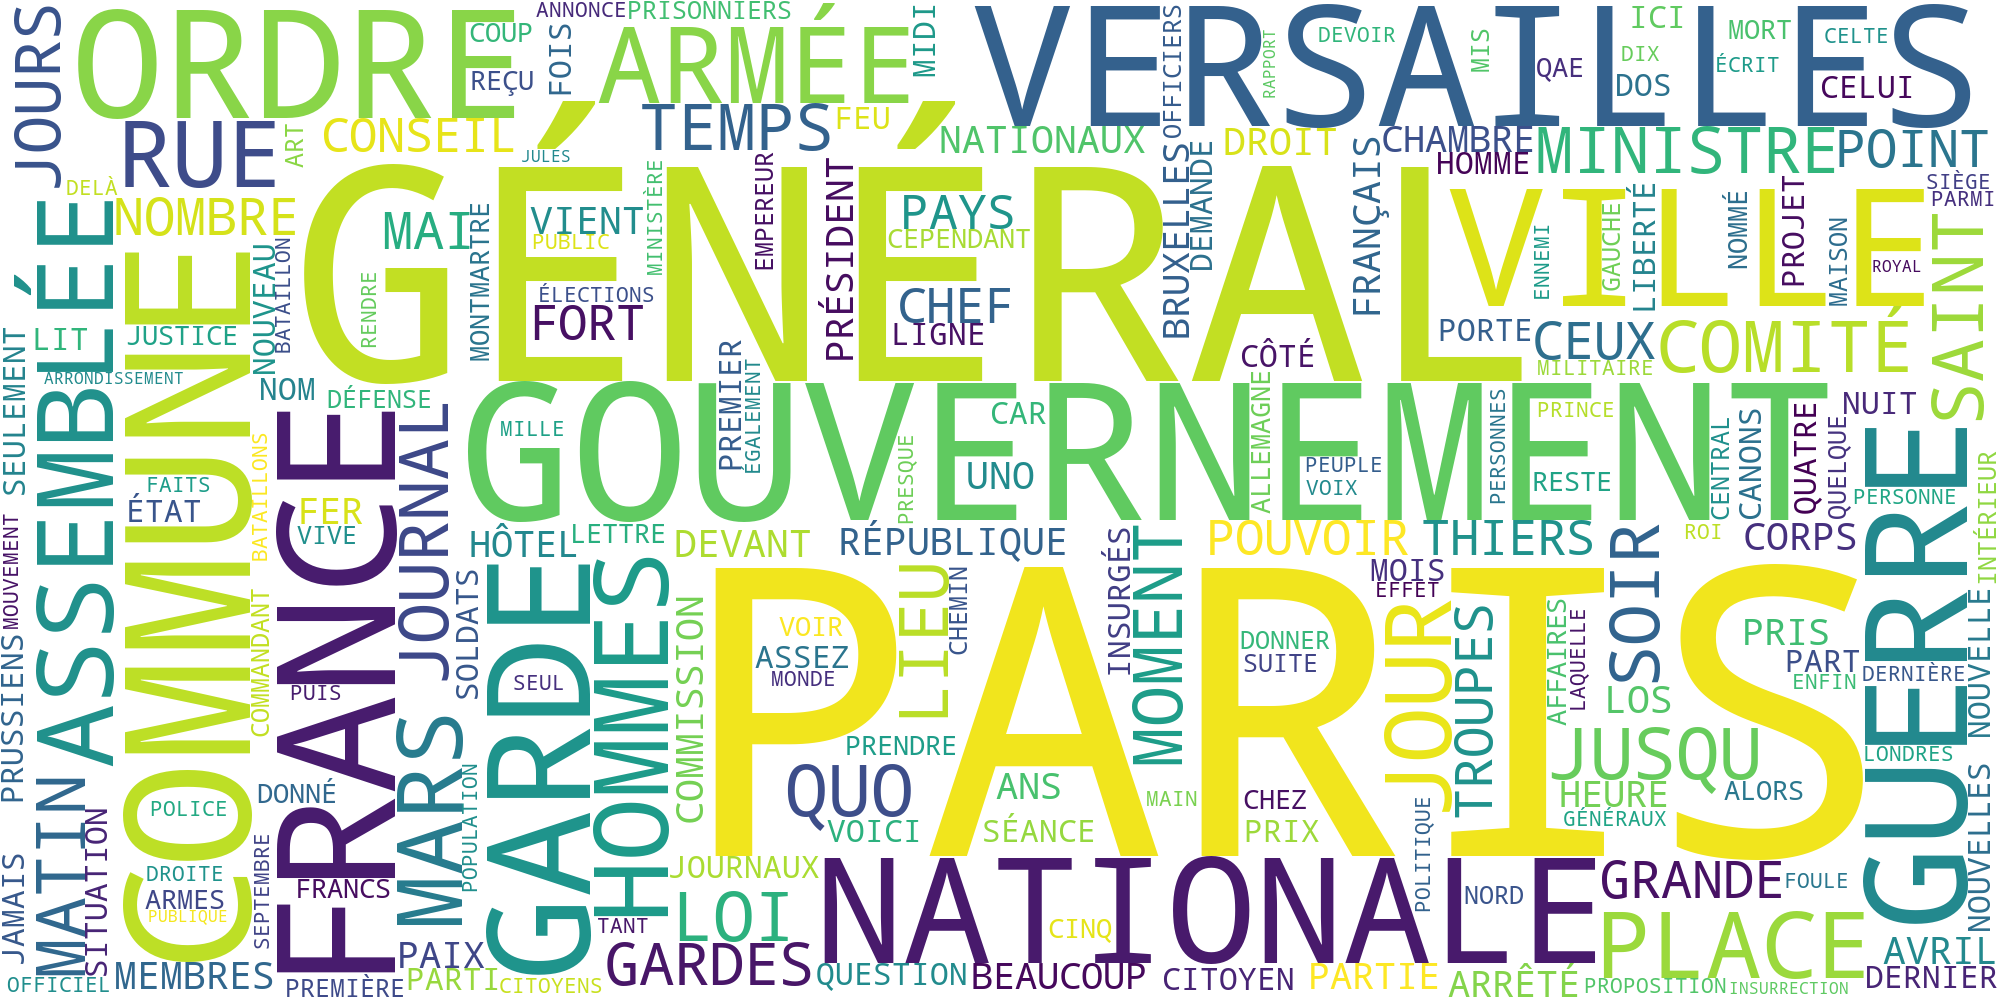

In [20]:
cloud = WordCloud(width=2000, height=1000, background_color='white').generate_from_frequencies(frequencies)
cloud.to_file(os.path.join(temp_path, f"{year}.png"))
Image(filename=os.path.join(temp_path, f"{year}.png"))

## Bigrammes de mots-clé par journal

In [ ]:
# L'Indépendance Belge
keywords = kw_extractor.extract_keywords(text)
    kept = []
    for kw, score in keywords:
        words = kw.split()
        if len(words) == 2:
            kept.append(kw)
    print(f"{f} mentions these keywords: {', '.join(kept)}...")

# Reconnaissance d'entités nommées avec SpaCy

## Imports

In [43]:
# copie de s3_ner.ipynb du module 3
from collections import defaultdict
import sys
import spacy
from spacy.lang.fr.examples import sentences

In [44]:
nlp = spacy.load('fr_core_news_md')

## Appliquer la reconnaissance d'entités nommées sur les textes sélectionnés

In [45]:
# Charger le texte
n=100000
text = open("../data/tmp/TP4.txt", encoding='utf-8').read()[:n]

In [46]:
%%time
# Traiter le texte

doc = nlp(text)

CPU times: total: 2.88 s
Wall time: 3.04 s


In [47]:
# Compter les entités
people = defaultdict(int)
for ent in doc.ents:
    if ent.label_ == "PER" and len(ent.text) > 3:
        people[ent.text] += 1

In [48]:
# Trier et imprimer

sorted_people = sorted(people.items(), key=lambda kv: kv[1], reverse=True)

for person, freq in sorted_people[:50]:
    print(f"{person} apparait {freq} fois dans le corpus")

Jules Favre apparait 8 fois dans le corpus
M. Pelletan apparait 5 fois dans le corpus
César apparait 5 fois dans le corpus
M. le comte Daru apparait 4 fois dans le corpus
m. jules favre apparait 3 fois dans le corpus
président Schneider apparait 3 fois dans le corpus
h. baba apparait 3 fois dans le corpus
M. le ministre apparait 3 fois dans le corpus
Daru apparait 3 fois dans le corpus
M. Rochefort apparait 2 fois dans le corpus
Reine apparait 2 fois dans le corpus
Gladstone apparait 2 fois dans le corpus
Autr apparait 2 fois dans le corpus
Lots autrich. apparait 2 fois dans le corpus
Pontife apparait 2 fois dans le corpus
m. horace apparait 1 fois dans le corpus
M. Rolle apparait 1 fois dans le corpus
Quanl apparait 1 fois dans le corpus
Schneider M. Ordinaire apparait 1 fois dans le corpus
Interrnptions. apparait 1 fois dans le corpus
M. Ordinaire apparait 1 fois dans le corpus
H. Rochefort apparait 1 fois dans le corpus
cala apparait 1 fois dans le corpus
H LE PRÉSIDENT apparait 1 f

In [49]:
# Compter les entités
organis = defaultdict(int)
for ent in doc.ents:
    if ent.label_ == "ORG" and len(ent.text) > 3:
        organis[ent.text] += 1

In [50]:
# Trier et imprimer

sorted_org = sorted(organis.items(), key=lambda kv: kv[1], reverse=True)

for org, freq in sorted_org[:50]:
    print(f"{org} apparait {freq} fois dans le corpus")

Chambre apparait 15 fois dans le corpus
Parlement apparait 2 fois dans le corpus
Sénat apparait 2 fois dans le corpus
sorlie apparait 1 fois dans le corpus
Bruit apparait 1 fois dans le corpus
Chambro apparait 1 fois dans le corpus
orima apparait 1 fois dans le corpus
Corps législatif d'un projet apparait 1 fois dans le corpus
Comment!. apparait 1 fois dans le corpus
letemp3 apparait 1 fois dans le corpus
PAnis apparait 1 fois dans le corpus
SOCIETE apparait 1 fois dans le corpus
Chambre des Lords apparait 1 fois dans le corpus
Saxonia apparait 1 fois dans le corpus
Banque de Prusse apparait 1 fois dans le corpus
Nestorian apparait 1 fois dans le corpus
DB I-AIU3 apparait 1 fois dans le corpus
SOS 00 apparait 1 fois dans le corpus
Crédit mob apparait 1 fois dans le corpus
Banque atttr. apparait 1 fois dans le corpus
Hiulii do apparait 1 fois dans le corpus
Société apparait 1 fois dans le corpus
Esch sur-1'Alzette apparait 1 fois dans le corpus
ministre d'Etat de Luxembourg apparait 1 f

In [51]:
# Compter les lieux
lieux = defaultdict(int)
for ent in doc.ents:
    if ent.label_ == "LOC" and len(ent.text) > 3:
        lieux[ent.text] += 1

In [32]:
# Trier et imprimer

sorted_lieux = sorted(lieux.items(), key=lambda kv: kv[1], reverse=True)

for lieu, freq in sorted_lieux[:50]:
    print(f"{lieu} apparait {freq} fois dans le corpus")

Etat apparait 17 fois dans le corpus
Bruxelles apparait 17 fois dans le corpus
Belgique apparait 15 fois dans le corpus
Congo apparait 9 fois dans le corpus
Brux apparait 8 fois dans le corpus
Gand apparait 5 fois dans le corpus
France apparait 4 fois dans le corpus
Paris apparait 4 fois dans le corpus
état apparait 4 fois dans le corpus
Anvers apparait 3 fois dans le corpus
Ixelles apparait 3 fois dans le corpus
Territoire de l’ancienne commune de apparait 2 fois dans le corpus
de Belgique apparait 2 fois dans le corpus
Etats-Unis apparait 2 fois dans le corpus
Luxembourg apparait 2 fois dans le corpus
Angleterre apparait 2 fois dans le corpus
théâtre du Parc apparait 2 fois dans le corpus
Hollywood apparait 2 fois dans le corpus
Vienne apparait 2 fois dans le corpus
Brabant apparait 2 fois dans le corpus
Samedi apparait 2 fois dans le corpus
Uccle apparait 2 fois dans le corpus
rue de la Concorde apparait 2 fois dans le corpus
Panama apparait 2 fois dans le corpus
Mons apparait 2 foi

# Sentiment analysis avec Textblob-FR

## Imports

In [52]:
import sys
from textblob import Blobber
from textblob_fr import PatternTagger, PatternAnalyzer

## Fonction

In [53]:
tb = Blobber(pos_tagger=PatternTagger(), analyzer=PatternAnalyzer())

def get_sentiment(input_text):
    blob = tb(input_text)
    polarity, subjectivity = blob.sentiment
    polarity_perc = f"{100*abs(polarity):.0f}"
    subjectivity_perc = f"{100*subjectivity:.0f}"
    if polarity > 0:
        polarity_str = f"{polarity_perc}% positive"
    elif polarity < 0:
        polarity_str = f"{polarity_perc}% negative"
    else:
        polarity_str = "neutral"
    if subjectivity > 0:
        subjectivity_str = f"{subjectivity}% subjective"
    else:
        subjectivity_str = "perfectly objective"
    print(f"This text is {polarity_str} and {subjectivity_str}.")

## Analyser le sentiment d'une phrase

In [55]:
get_sentiment("Les journaux du matin confirment qu'à l'occasion des 21 canons du concile publiés récemment, le comte de Beust aurait, de sa propre initiative, adressé des représentations sérieuses à la cour de Rome, et qu'il aurait formellement protesté contre les suites éventuelles d'une pareille décision de la part du concile.")

This text is 20% positive and 0.2125% subjective.


In [56]:
get_sentiment("5,000 Badois avec 20 canons ont occupé Colmar le 14, après un léger combat avec des francs-tireurs et des gardes nationaux.")

This text is 3% positive and 0.10000000000000002% subjective.


In [37]:
get_sentiment("")

This text is 18% negative and 0.55% subjective.


In [38]:
get_sentiment("")

This text is 15% negative and 0.06666666666666667% subjective.


In [39]:
get_sentiment("Cette ligne tend essentiellement à donner l’impression au monde extérieur qu’il y a quelque chose de changé à Moscou depuis l’avènement de Malenkov et qu'à la dictature de Staline a succédé une autorité « collective ». ")

This text is 5% positive and perfectly objective.


In [40]:
get_sentiment("Pièces bien vivantes, mais trop de pièces noires! ")

This text is 11% positive and 0.30000000000000004% subjective.


In [41]:
get_sentiment("Il nous a paru, parfois, que tel mouvement semblait contrarié sinon contraint par le décor.")

This text is neutral and perfectly objective.


In [42]:
get_sentiment("Cette visite était également en liaison avec l’organisation d'une exposition de produits de l'industrie belge qui doit avoir lieu prochainement au Mexique")

This text is 10% positive and 0.175% subjective.


In [43]:
get_sentiment("On ne manquera pas de trouver étrange qu'une question qui ne pouvait être traitée que sur le pian national et dans la pleine lumière, soit ainsi tenue dans l’ombre et entourée d'un black-out aussi absolu.")

This text is 4% negative and 0.13999999999999999% subjective.


In [44]:
get_sentiment("On découvrira avec intérêt cette peinture sensible et un peu appliquée. ")

This text is 18% positive and 0.26875000000000004% subjective.
